### Table of Contents

* [Goals](#Goals)
* [Data](#Data)
    * [Data context](#data_context)
    * [Loading the Data](#loading_data)
    * [Data Information](#data_information)
- [Data Cleaning](#Data_Cleaning)
- [Exploratory Data Analysis](#Exploratory_Analysis)

### Goals <a class="anchor" id="Goals">

This notebook contains an analysis on Supermarket Sales data. The goal for this project is to do the following:
    
    - Get acquinted with the data
    - Clean the data so it is ready for analysis
    - Develop questions for analysis
    - Analyze variables within the data to gain patterns and insights

### Data <a class="anchor" id="Data">

The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Some code inspiration for this analysis was sourced from 

#### Data Context <a class="anchor" id="data_context">

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

##### Attribute information
    
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and -beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


#### Loading Data <a class="anchor" id="loading_data">
    
First, we are loading the necessary libraries.

In [2]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\mateo\OneDrive - CORE Education Trust\Documents\GitHub\CodeCademy-Projects\Business Intelligence Data Analyst\Final Project\Supermarket Sales\supermarket_sales - Sheet1.csv")

# Having a first look at our data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Data Information <a class="anchor" id="data_information">

To understand our data we need to go through some fundamental questions:
    
    - We are going to check how many columns and rows we have.
    - The name and datatype of each column.
    - If there are any missing values.
    - If we should rename any of the column for better consistency.
    - Basic summary statistics.
    - If there are any duplicates.

In [4]:
print(f"There are {len(df.columns)} columns and {df.shape[0]} rows in our database.\n\n")
print(f"The column names with their data types and their missing values\n")
df.info()

There are 17 columns and 1000 rows in our database.


The column names with their data types and their missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment       

In [5]:
print(f"Basic summary statistics\n")
df.describe()


Basic summary statistics



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We notice that gross margin percentage remains the same. We can drop it, since it doesn't provide any new information.

In [6]:
print(f"There are {df.duplicated().sum()} duplicates.")

There are 0 duplicates.


### Data Cleaning <a class="anchor" id="Data_Cleaning">

As mentioned we will remove the gross margin percentage.
Another step that we can take is to remove the column Branch, because it has the same information as column City.
Lastly we can drop Tax 5% because we have the same information on the column gross income

In [7]:
df1 = df.drop(columns=["gross margin percentage", "Branch","Tax 5%"])
df1.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


### Exploratory Data Analysis <a class="anchor" id="Exploratory_Analysis">
    
We are going to try a couple of hypothesis.
    
    - Which of the branches has more sales?
    - Which customer type buys the most? and how do they fare against each other?
    - Who buys more? Men or women? Is it the same on all the branches?
    - Which category sells the most?
    - What is the average price of a unit?
    - Do we have more purchases with large quantities or small ones.
    - How do the total sales per day look like? Can we infer any patterns?
    - Same with the time. Can we see any patterns where we have more sells?
    - What payment method is used the most? How much money is being paid with that method?
    - Is the rating correlated with the total ammount spend?

##### Which of the branches has more sales?


In [8]:
df["Total"].groupby(df.City).sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

They all seem to have almost the same amount of money generated. We can mention that there is a good management going on.

##### Which customer type buys the most? and how do they fare against each other?

In [9]:
df["Total"].groupby(df["Customer type"]).sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

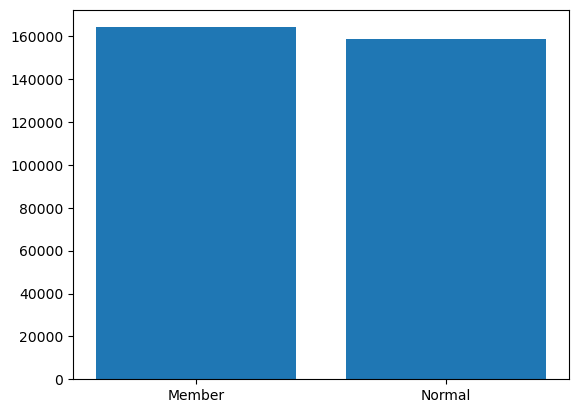

In [10]:
%matplotlib inline
plt.figure()
grouped_df = df.groupby("Customer type")["Total"].sum().reset_index()

plt.bar(grouped_df["Customer type"], grouped_df["Total"])
plt.show()

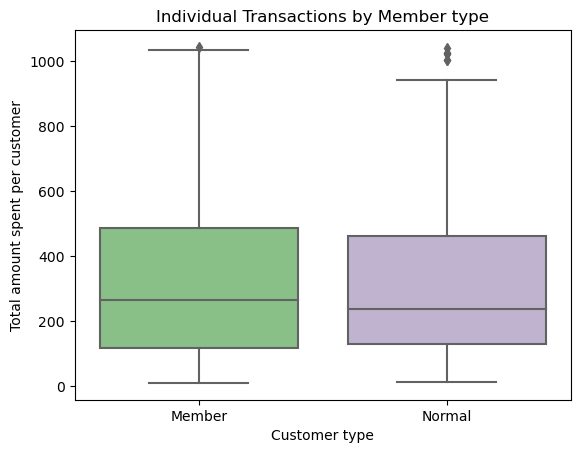

In [112]:
sns.boxplot(x="Customer type", y='Total', data=df, palette='Accent')
plt.xlabel('Customer type')
plt.ylabel('Total amount spent per customer')
plt.title('Individual Transactions by Member type')
plt.show()

In [14]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

The data is very similar. We do not have anything that differentiates them. This by itself is something bad. The members probably pay a certain amount for the membership, however they spent the same as the normal client. This might indicate that they do not have enough incentives to buy more products. Something that could solve this is special deals for members-only.

##### Who buys more? Men or women? Is it the same on all the branches?

In [15]:
df.Total.groupby(df.Gender).sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [33]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [23]:
gender = df.groupby(['Gender','City'])['Total'].sum().reset_index()
gender

,Gender,City,Total
0,Female,Mandalay,52928.2950
1,Female,Naypyitaw,61685.4630
2,Female,Yangon,53269.1670
3,Male,Mandalay,53269.3770
4,Male,Naypyitaw,48883.2435
5,Male,Yangon,52931.2035


This data seems promising. Let's make a graph out of it.

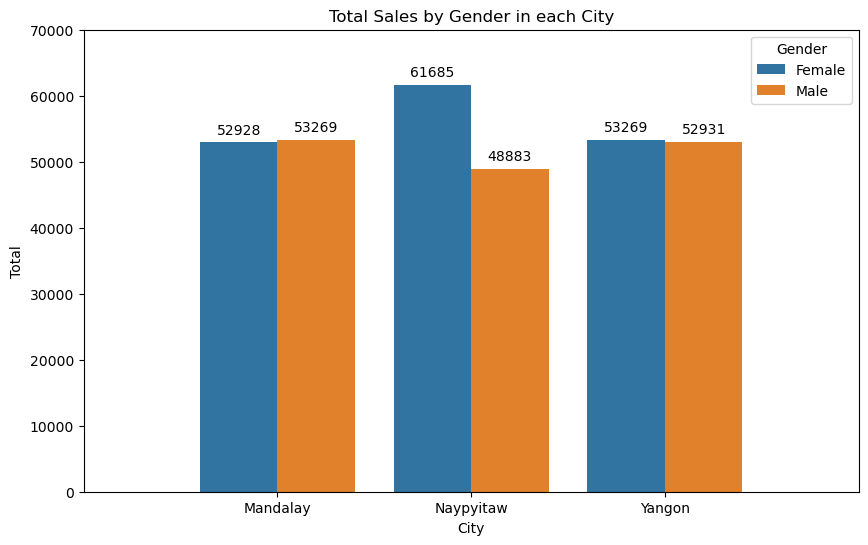

In [32]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='City', y='Total', hue='Gender', data=gender)
plt.xlabel('City')
plt.ylabel('Total')
plt.legend(title='Gender')
plt.title('Total Sales by Gender in each City')
# Add total labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.axis([-1,3,0,70000]) # Zooming out because of the legend
plt.show()

We notice that on Naypytaw, Females spend a lot more money than Males. This can be an indicator to put more Female related products, and focus a bit more on women.

### Which category sells the most?

In [40]:
# How many products we have per category?

df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [44]:
df.Total.groupby(df['Product line']).sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

We notice that most of the categories are in the same range. It would be a nice question on why Health and Beauty are last.

#### What is the average price of a unit? Where do their prices fall?

I want to create a new column called Unit price range. There we will distribute the unit prices to 4 categories:

    - From 0 to 20 they will be called "Low Price"
    - From 21 to 50 they will be called "Medium Price"
    - From 51 to 100 they will be called "High Price"

In [51]:
def categorize_price(price):
    if price >= 0 and price < 21:
        return "Low price"
    elif price >= 21 and price < 51:
        return "Medium price"
    else:
        return "High price"

df['Unit price range'] = df['Unit price'].apply(categorize_price)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unit price range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,high price
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low price
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,medium price
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,high price
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high price


Let's check how many products we have in each unit price range

In [52]:
df['Unit price range'].value_counts()

high price      555
medium price    330
low price       115
Name: Unit price range, dtype: int64

Text(0.95, 0.95, 'High price is 51 till 100\nMedium price is 21 to 50\nLow price is 0 to 20')

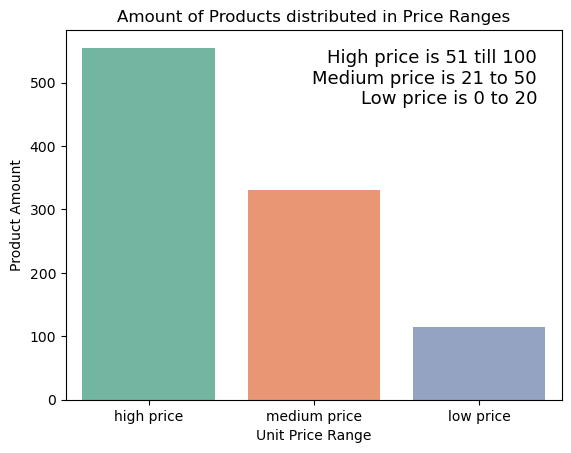

In [95]:
sns.set_palette("Set2")
sns.barplot(x=df['Unit price range'].value_counts().index, y = df['Unit price range'].value_counts().values)
plt.xlabel("Unit Price Range")
plt.ylabel("Product Amount")
plt.title("Amount of Products distributed in Price Ranges")

text = "High price is 51 till 100\nMedium price is 21 to 50\nLow price is 0 to 20"
plt.text(0.95, 0.95, text, transform=plt.gca().transAxes, ha='right', va='top', fontsize=13)

Surprisingly most of our products fall under high price range. A point worth investigating is, if any of the stores have a higher ammount of high priced products. Does the Total income for that store decrease?

#### Do we have more purchases with large quantities or small ones.

Let's do the same as above. We can create a new column called Quantity range. It will be a distribution for 4 categories:

    - From 0 to 3 they will be called "Low Quantity"
    - From 4 to 6 they will be called "Medium Quantity"
    - From 7 to 10 they will be called "High Quantity"

In [96]:
def categorize_price(price):
    if price >= 0 and price < 4:
        return "Low quantity"
    elif price >= 4 and price < 7:
        return "Medium quantity"
    else:
        return "High quantity"

df['Quantity range'] = df['Quantity'].apply(categorize_price)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unit price range,Quantity range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,high price,high quantity
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low price,medium quantity
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,medium price,high quantity
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,high price,high quantity
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high price,high quantity


<Axes: >

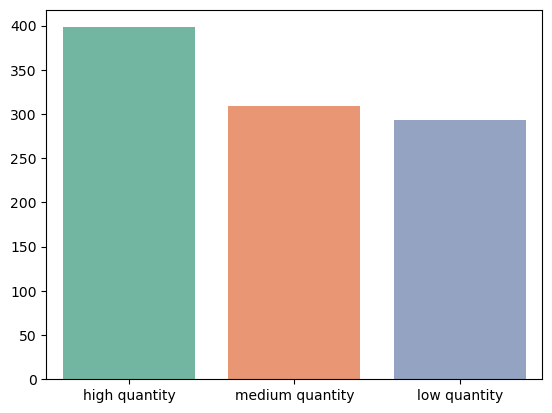

In [99]:
sns.barplot(y=df['Quantity range'].value_counts().values, x=df['Quantity range'].value_counts().index)

Most of the transaction are those with high quantity. It would be worth to a/b test some theories on it. For example what if we provide a discount when clients buy high quantities? Will we have an increase in demand?

In [101]:
df.groupby(['Quantity range'])['Total'].sum()

Quantity range
high quantity      202693.3650
low quantity        33518.8455
medium quantity     86754.5385
Name: Total, dtype: float64

([<matplotlib.patches.Wedge at 0x1894610a3d0>,
 [Text(-0.4292330124706976, 1.0127976209516538, 'high quantity'),
  Text(0.0822186059657794, -1.096923014998338, 'medium quantity'),
  Text(1.0420472280051425, -0.3523316258963975, 'low quantity')],
 [Text(-0.2341270977112896, 0.5524350659736293, '62.8%'),
  Text(0.04484651234497058, -0.598321644544548, '26.9%'),
  Text(0.5683893970937139, -0.19218088685258042, '10.4%')])

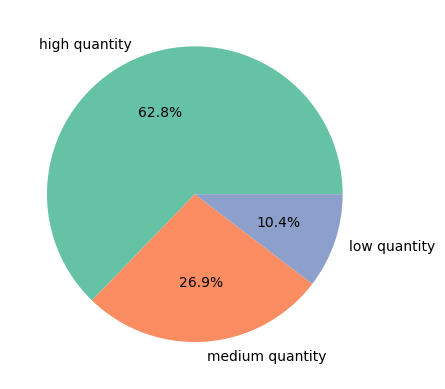

In [111]:
plt.pie(df.groupby(['Quantity range'])['Total'].sum().sort_values(ascending=False), labels=df['Quantity range'].value_counts().index, autopct='%1.1f%%')
# plt.legends(df['Quantity range'].unique)

These are some amazing results. Most of the income comes from the high quantity transactions. The company can either continue to develop their marketing and sales on high quantity or try to increase their sales for low and medium quantity transactions.

#### How do the total sales per day look like? Can we infer any patterns?

In [113]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unit price range,Quantity range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,high price,high quantity
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low price,medium quantity
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,medium price,high quantity
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,high price,high quantity
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high price,high quantity


In [122]:
df['Datetime'] = df.Date + " " + df.Time
df['Datetime'] = df.Datetime.apply(pd.to_datetime)
df.set_index("Datetime", inplace=True)
plt.plot(df.Datetime.resample("M").sum().index, df.resample("M").sum().Total)

plt.plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [123]:
df_monthly = df.resample('M').sum()

# Plot the Total values against months
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly.Total, marker='o')

AttributeError: 'NaTType' object has no attribute 'normalize'

- Why do we have more Women buying things on Naypytaw? Is it because we have more female products there? Such as fashion accessories, Health and beauty products?
- Why does the category health and beauty earns less income than the rest of categories? Is it because their price?
- 